# Working with Pre-Trained Models and Pre-Packaged Datasets in Pytorch #

**Some Notes:** 

1. You can save your model set for future use--in particular, for use in **inference** (i.e., drawing conclusions from the data) with model.save() and model.load().

2. The pytorch package comes with several subsidiary packages for dealing with the types of data that Neural Networks are most famous for:

+ torchvision
+ torchaudio
+ torchtext

3. These packages primarily provide three things: 

+ (Well-known) Pre-trained models
+ (Pre-packaged) datasets
+ Methods for transforming those datasets

4. There are other hubs available that do similar things.  One of the most famous ones is [Huggingface](https://huggingface.co/), which specializes in Transformer and LLM models. Many of these are built on top of pytorch. 

We will do some examples with the Pytorchc torchvision package.

In [1]:
import torch
import torchvision

## 1. Pre-Trained Models in Pytorch ###

### Key Points: ###

"All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]."

### Alexnet and the Pytorch Model Hub ###

See [here](https://pytorch.org/hub/) for an overview of the Pytorch Hub and [here](https://pytorch.org/docs/stable/hub.html) for methods. **Note:** This is just about the models--not datasets. The Alexnet tutorial I will be following for the first part is [here](https://pytorch.org/hub/pytorch_vision_alexnet/).  You can download an .ipynb from Colab at the link. 

There are really only three methods for interacting with torch hub:

+ torch.hub.list()
+ torch.hub.help()
+ torch.hub.load()

#### List of Models on Torchvision hub ####

In [8]:
torch.hub.list('pytorch/vision')

Using cache found in /home/aleahy/.cache/torch/hub/pytorch_vision_main


['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fcn_resnet101',
 'fcn_resnet50',
 'get_model_weights',
 'get_weight',
 'googlenet',
 'inception_v3',
 'lraspp_mobilenet_v3_large',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'r2plus1d_18',
 'r3d_18',
 'raft_large',
 'raft_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1

#### Information on Alexnet ####

In [5]:
print(torch.hub.help('pytorch/vision','alexnet'))

AlexNet model architecture from `One weird trick for parallelizing convolutional neural networks <https://arxiv.org/abs/1404.5997>`__.

    .. note::
        AlexNet was originally introduced in the `ImageNet Classification with
        Deep Convolutional Neural Networks
        <https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html>`__
        paper. Our implementation is based instead on the "One weird trick"
        paper above.

    Args:
        weights (:class:`~torchvision.models.AlexNet_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.AlexNet_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.squeezenet.AlexNet``
            base cla

Using cache found in /home/aleahy/.cache/torch/hub/pytorch_vision_main


#### Loading Alexnet ####

**Note:**  The model.eval() line converts the model into 'inference' mode, and disables dropout (among other things).

In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /home/aleahy/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/aleahy/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|████████████████████████████████████████████████████████████████████| 233M/233M [00:02<00:00, 115MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## 2.Transforms ##

**WARNING AGAIN:** (Mentioned above.)  "All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape `(3 x H x W)`, where `H` and `W` are expected to be at least `224`. The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`."

### A Sample for Prediction ###

In [2]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

### Merging Datasets and Models with Transforms ###

Two points:

+ Pre-packaged Datasets are basically downloaders.  **Transforms** are a key part of getting this data into the model.  Transforms for torchvision can be found [here](https://pytorch.org/vision/0.9/transforms.html)


+ Alexnet is famous because it unequivocally won the [Imagenet competition](https://image-net.org/challenges/LSVRC/) in 2012.  The imagenet classes are [here](https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt).  Note there are 1000 classes, so this is not a simple task!

In [13]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image) 
# print(input_tensor.shape)   # A test of mine - A. Leahy
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)
print(torch.argmax(probabilities))

tensor([-1.6531e+00, -4.3505e+00, -1.8172e+00, -4.2143e+00, -3.1914e+00,
         3.4164e-01,  1.0877e+00,  5.9350e+00,  8.0425e+00, -7.0242e-01,
        -9.4130e-01, -6.0822e-01, -2.4097e-01, -1.9946e+00, -1.5288e+00,
        -3.2656e+00, -5.5800e-01,  1.0524e+00,  1.9211e-01, -4.7202e+00,
        -3.3880e+00,  4.3048e+00, -1.0997e+00,  4.6132e+00, -5.7419e-03,
        -5.3437e+00, -4.7378e+00, -3.3974e+00, -4.1287e+00,  2.9064e-01,
        -3.2955e+00, -6.7051e+00, -4.7232e+00, -4.1778e+00, -2.1859e+00,
        -2.9469e+00,  3.0465e+00, -3.5882e+00, -6.3890e+00, -4.4203e+00,
        -3.3685e+00, -5.0983e+00, -4.9006e+00, -5.5235e+00, -3.7233e+00,
        -4.0204e+00,  2.6998e-01, -4.4702e+00, -5.6617e+00, -5.4880e+00,
        -2.6801e+00, -3.2129e+00, -1.6294e+00, -5.2289e+00, -2.7495e+00,
        -2.6286e+00, -1.8206e+00, -2.3196e+00, -5.2806e+00, -3.7652e+00,
        -3.0987e+00, -4.1421e+00, -5.2531e+00, -4.6504e+00, -3.5815e+00,
        -4.0189e+00, -4.0008e+00, -4.5512e+00, -3.2

### Identifying the Category

In [4]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-02-25 14:53:52--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-02-25 14:53:53 (159 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [5]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.7244765162467957
wallaby 0.13937847316265106
Pomeranian 0.058749932795763016
Angora 0.02282979153096676
Arctic fox 0.012450147420167923


#### Another Approach ####

In [15]:
categories[258]

'Samoyed'

## 3. Pre-packaged Datasets ##

### Oxford Pets Dataset ###

**Note:** This is one of the datasets on the [Torchvision Datasets page](https://pytorch.org/vision/stable/datasets.html) and the reference page for the class is [here](https://pytorch.org/vision/stable/generated/torchvision.datasets.OxfordIIITPet.html#torchvision.datasets.OxfordIIITPet).

Also, here is [a notebook](https://github.com/Skuldur/Oxford-IIIT-Pets-Pytorch/blob/master/Pytorch%20Image%20Classification.ipynb) working with this dataset, but it doesn't use the built-in dataset.

The actual [code for the OxfordIIITPet class](https://pytorch.org/vision/stable/_modules/torchvision/datasets/oxford_iiit_pet.html#OxfordIIITPet) will also be helpful, particularly as a way to see how to construct Datasets, or as a way to see how to get the 'cat vs. dog' classification instead of the breed classification.  (It's not very long.) 

In [2]:
from torchvision import transforms

In [7]:
preprocess = transforms.Compose  # Use the same transform as above--we want the same size image.
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [8]:
mypets = torchvision.datasets.OxfordIIITPet(root='OxfordPets', split='trainval', transform = preprocess, target_types='category', download=True)

**Note:** This creates an images directory and an annotations directory.  The annotations are described as:

In [9]:
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images
#   Abyssinian_100 1 1 1
#   Abyssinian_101 1 1 1

### How to to access elements of a Dataset object 

In [35]:
import matplotlib.pyplot as plt

In [13]:
mypets

Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: OxfordPets
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [34]:
(pets_input, pets_target) = mypets[40]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


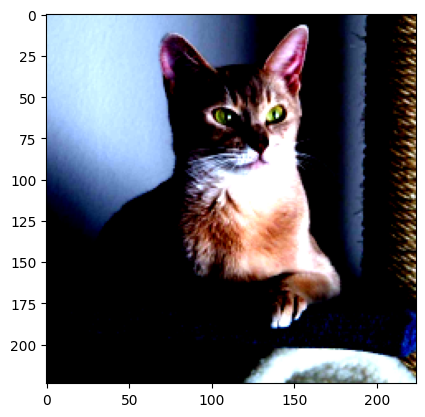

In [36]:
plt.imshow(pets_input.permute(1,2,0))

In [37]:
pets_target

0

The mypets class gets fed to a DataLoader.  See [here](https://pytorch.org/vision/stable/datasets.html). **But** you need to transform the data first!  (See above.)

In [10]:
data_loader = torch.utils.data.DataLoader(mypets,
                                          batch_size=2,
                                          shuffle=True)

In [77]:
for myX, myy in data_loader:
    print(myX)
    print(myy)
    break

tensor([[[[-0.0801, -0.1143, -0.1143,  ..., -0.6623, -0.7137, -0.7308],
          [-0.2171, -0.1999, -0.1657,  ..., -0.6109, -0.5938, -0.5938],
          [-0.4739, -0.3883, -0.3883,  ..., -0.5082, -0.4911, -0.4739],
          ...,
          [ 0.2624,  0.3652,  0.4166,  ..., -1.2788, -1.3130, -1.1932],
          [-0.0458, -0.0629,  0.0569,  ..., -1.2445, -1.2788, -1.2445],
          [-0.1828, -0.1828, -0.0458,  ..., -1.2788, -1.2788, -1.2788]],

         [[-0.8102, -0.8277, -0.8102,  ..., -0.6352, -0.6702, -0.7052],
          [-0.8627, -0.8452, -0.7927,  ..., -0.5651, -0.5651, -0.5826],
          [-0.9328, -0.8803, -0.8627,  ..., -0.4951, -0.4951, -0.4776],
          ...,
          [ 0.2577,  0.3978,  0.4328,  ..., -1.2829, -1.3004, -1.1429],
          [-0.0224, -0.0224,  0.0651,  ..., -1.2479, -1.2654, -1.1954],
          [-0.1275, -0.1275, -0.0574,  ..., -1.2829, -1.2829, -1.2479]],

         [[-0.6367, -0.6541, -0.6715,  ..., -0.5321, -0.5321, -0.6367],
          [-0.6018, -0.5844, -

## myPet: A homemade version of OxfordIIITPet with Species as Labels ##

By default, the labels are the *species* of cat or dog.  What about something simpler?  Like just whether it's a dog or cat.  I call this class the "myPet" class.

In [50]:
import os
import os.path
import pathlib
from typing import Any, Callable, Optional, Sequence, Tuple, Union

from PIL import Image

#  Original code:
#    https://pytorch.org/vision/stable/_modules/torchvision/datasets/oxford_iiit_pet.html#OxfordIIITPet
#  Had to modify the intros to these next two to point to the specific file in torchvision/datasets/
#  Observation: torchivsion.datasets.utils is torchvision/datasets/utils.py, etc

from torchvision.datasets.utils import download_and_extract_archive, verify_str_arg
from torchvision.datasets.vision import VisionDataset


class myPet(VisionDataset):
    """`Oxford-IIIT Pet Dataset   <https://www.robots.ox.ac.uk/~vgg/data/pets/>`_.

    Args:
        root (string): Root directory of the dataset.
        split (string, optional): The dataset split, supports ``"trainval"`` (default) or ``"test"``.
        target_types (string, sequence of strings, optional): Types of target to use. Can be ``category`` (default) or
            ``segmentation``. Can also be a list to output a tuple with all specified target types. The types represent:

                - ``category`` (int): Label for one of the 37 pet categories.
                - ``segmentation`` (PIL image): Segmentation trimap of the image.

            If empty, ``None`` will be returned as target.

        transform (callable, optional): A function/transform that  takes in a PIL image and returns a transformed
            version. E.g, ``transforms.RandomCrop``.
        target_transform (callable, optional): A function/transform that takes in the target and transforms it.
        download (bool, optional): If True, downloads the dataset from the internet and puts it into
            ``root/oxford-iiit-pet``. If dataset is already downloaded, it is not downloaded again.
    """

    _RESOURCES = (
        ("https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz", "5c4f3ee8e5d25df40f4fd59a7f44e54c"),
        ("https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz", "95a8c909bbe2e81eed6a22bccdf3f68f"),
    )
    _VALID_TARGET_TYPES = ("category", "segmentation")

    def __init__(
        self,
        root: str,
        split: str = "trainval",
        target_types: Union[Sequence[str], str] = "category",
        transforms: Optional[Callable] = None,
        transform: Optional[Callable] = None,
        target_transform: Optional[Callable] = None,
        download: bool = False,
    ):
        self._split = verify_str_arg(split, "split", ("trainval", "test"))
        if isinstance(target_types, str):
            target_types = [target_types]
        self._target_types = [
            verify_str_arg(target_type, "target_types", self._VALID_TARGET_TYPES) for target_type in target_types
        ]

        super().__init__(root, transforms=transforms, transform=transform, target_transform=target_transform)
        self._base_folder = pathlib.Path(self.root) / "oxford-iiit-pet"
        self._images_folder = self._base_folder / "images"
        self._anns_folder = self._base_folder / "annotations"
        self._segs_folder = self._anns_folder / "trimaps"

        if download:
            self._download()

        if not self._check_exists():
            raise RuntimeError("Dataset not found. You can use download=True to download it")

        image_ids = []
        self._labels = []
        with open(self._anns_folder / f"{self._split}.txt") as file:
            for line in file:
                image_id, label0, label, *_ = line.strip().split()
                image_ids.append(image_id)
                self._labels.append(int(label) - 1)

        self.classes = [
            " ".join(part.title() for part in raw_cls.split("_"))
            for raw_cls, _ in sorted(
                {(image_id.rsplit("_", 1)[0], label) for image_id, label in zip(image_ids, self._labels)},
                key=lambda image_id_and_label: image_id_and_label[1],
            )
        ]
        self.class_to_idx = dict(zip(self.classes, range(len(self.classes))))

        self._images = [self._images_folder / f"{image_id}.jpg" for image_id in image_ids]
        self._segs = [self._segs_folder / f"{image_id}.png" for image_id in image_ids]

    def __len__(self) -> int:
        return len(self._images)

    def __getitem__(self, idx: int) -> Tuple[Any, Any]:
        image = Image.open(self._images[idx]).convert("RGB")

        target: Any = []
        for target_type in self._target_types:
            if target_type == "category":
                target.append(self._labels[idx])
            else:  # target_type == "segmentation"
                target.append(Image.open(self._segs[idx]))

        if not target:
            target = None
        elif len(target) == 1:
            target = target[0]
        else:
            target = tuple(target)

        if self.transforms:
            image, target = self.transforms(image, target)

        return image, target

    def _check_exists(self) -> bool:
        for folder in (self._images_folder, self._anns_folder):
            if not (os.path.exists(folder) and os.path.isdir(folder)):
                return False
        else:
            return True

    def _download(self) -> None:
        if self._check_exists():
            return

        for url, md5 in self._RESOURCES:
            download_and_extract_archive(url, download_root=str(self._base_folder), md5=md5)

In [51]:
mypet2 = myPet(root='OxfordPets', split='trainval', transform = preprocess, target_types='category', download=True)

In [72]:
(pets_input, pets_target) = mypet2[50]

In [73]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


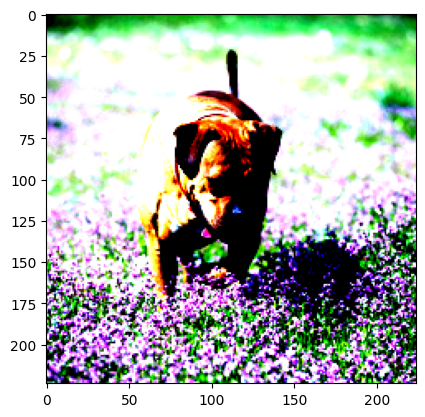

In [74]:
plt.imshow(pets_input.permute(1,2,0))

In [75]:
pets_target

1

In [83]:
data_loader = torch.utils.data.DataLoader(mypet2,
                                          batch_size=30,
                                          shuffle=True)

In [84]:
for _, myy in data_loader:
    print(myy)
    break

tensor([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1])
